In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import time
import os,sys
import requests
import pandas as pd
from pandas import DataFrame, read_csv
import scipy as sc
import numpy as np
import statsmodels.formula.api as sm
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud, STOPWORDS


In [3]:
googleData=pd.read_csv(r'Test.csv',header=0)
googleData

,Unnamed: 0,App,Category,Rating,Reviews,SizeInMB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8887,10834,FR Calculator,FAMILY,4.0,7.0,2.600000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8888,10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8889,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8890,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,14.228112,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 2. Data Analysis

In [10]:
googleData.describe()

,Unnamed: 0,Rating,Reviews,SizeInMB,Installs,Price
count,8892.000000,8892.000000,8.892000e+03,8892.000000,8.892000e+03,8892.000000
mean,5296.045434,4.187877,4.727764e+05,22.295941,1.648965e+07,0.963155
std,3100.582495,0.522377,2.905052e+06,21.769207,8.637600e+07,16.189341
min,0.000000,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000
25%,2667.750000,4.000000,1.640000e+02,6.300000,1.000000e+04,0.000000
50%,5138.500000,4.300000,4.714500e+03,15.000000,5.000000e+05,0.000000
75%,7993.500000,4.500000,7.126675e+04,29.741423,5.000000e+06,0.000000
max,10840.000000,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


We can see from the general statistics some information like: 

        1.most top apps are free
        2.most android apps are about 30 MB 

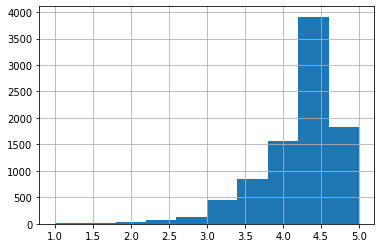

In [11]:
googleData.Rating.hist()

It's visiable that the distribution of rating of different apps rises exponentially

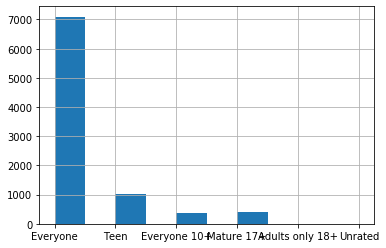

In [12]:
googleData['Content Rating'].hist()

It's clear that most apps are family friendly there for they are rated for everyone

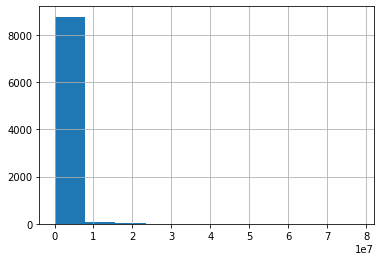

In [13]:
googleData.Reviews.hist()

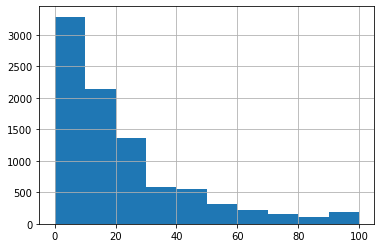

In [14]:
googleData.SizeInMB.hist()

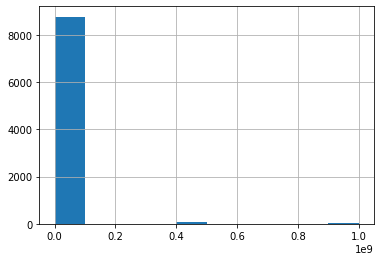

In [15]:
googleData.Installs.hist()

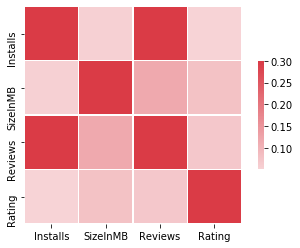

In [16]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(googleData[['Installs','SizeInMB','Reviews','Rating']].corr(),vmax=.3,center=0,cmap=cmap,
           square=True,linewidths=.5,cbar_kws={'shrink':.5})

We can see that the strongest Correlation is between:

    1.size of the app and the number of reviews.
    2.size of the app and the number of installs.

C:\Users\NetanelTarnorudsky\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



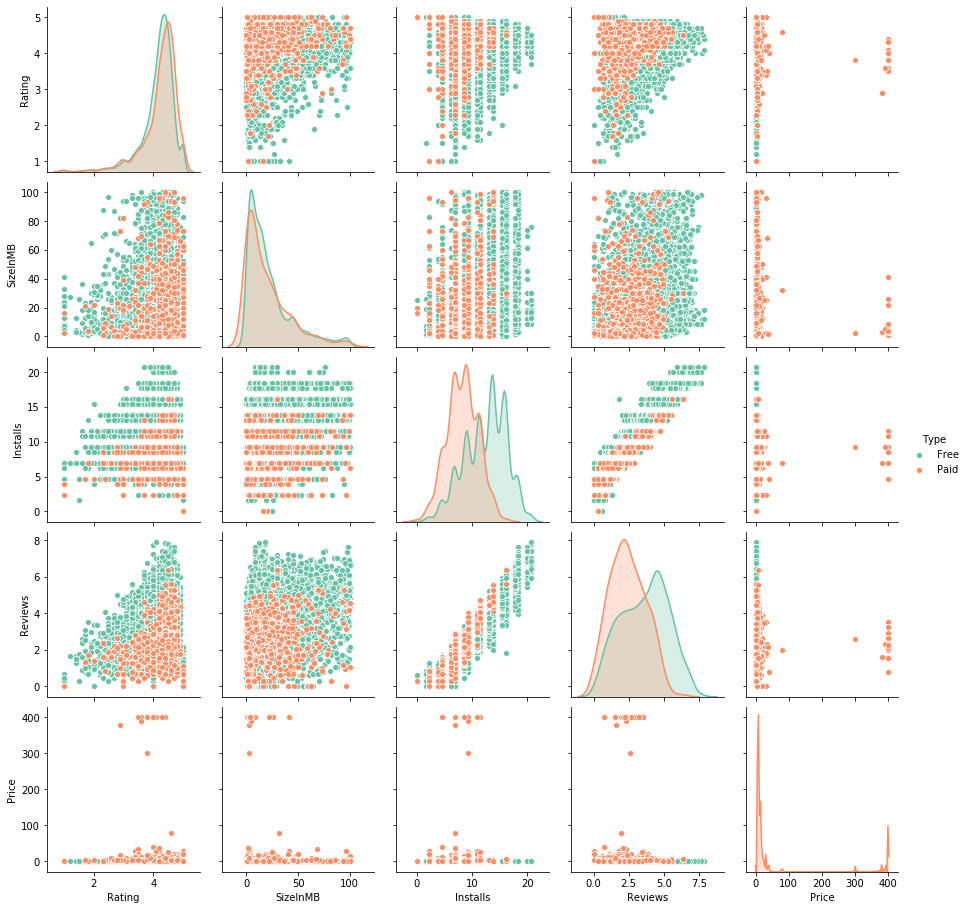

In [17]:
#General pairplot compares every 2 properties together

x = googleData['Rating'].dropna()
y = googleData['SizeInMB'].dropna()
z = googleData['Installs'][googleData.Installs!=0].dropna()
p = googleData['Reviews'][googleData.Reviews!=0].dropna()
t = googleData['Type'].dropna()
price = googleData['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)),columns=['Rating','SizeInMB', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

Based on the pair plots we conclude that free applications get higher ratings.
Still, the overall distributions of ratings for free applications and paid applications respectively are highly similar.
The same can be said for the overall distributions of sizes for free applications and paid applications.
Meanwhile, although free applications have more installations then paid applications, paid applications received more reviews than free applications

In [18]:
#all apps by categories pie chart.

number_of_apps_in_category = googleData['Category'].value_counts().sort_values(ascending=True)
data = [go.Pie(labels = number_of_apps_in_category.index,values = number_of_apps_in_category.values,hoverinfo = 'label+value')]
plotly.offline.iplot(data, filename='active_category')

according to the pie chart its visiable that most apps are family apps which is surprising that it's not gaming apps

    Question what is the most popular category for apps?
    Question will most popular categories have the largest number of apps?

Text(0.5, 1.0, 'Popularity of App Categories')

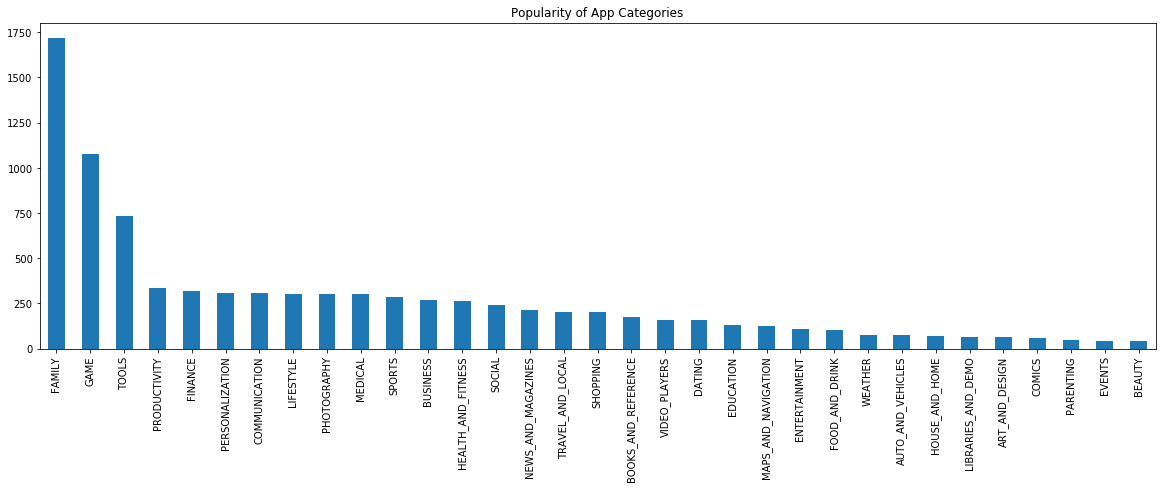

In [19]:
#Popularity of app
plt.figure(figsize=(20,6))
temp = googleData["Category"]
temp.value_counts().plot.bar()
plt.xticks()
plt.title("Popularity of App Categories")

according to the chart we can see that the most popular category is Family

We can clearly see that there is a correlation beetween most popular category and largest category    

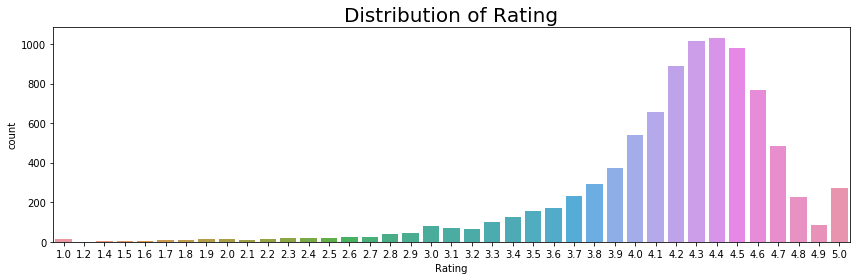

In [20]:
#Question what is the highest app rating?
plt.figure(figsize=(12,4))
plt.title("Distribution of Rating", size=20)
sns.countplot(googleData["Rating"])
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Reveiw')

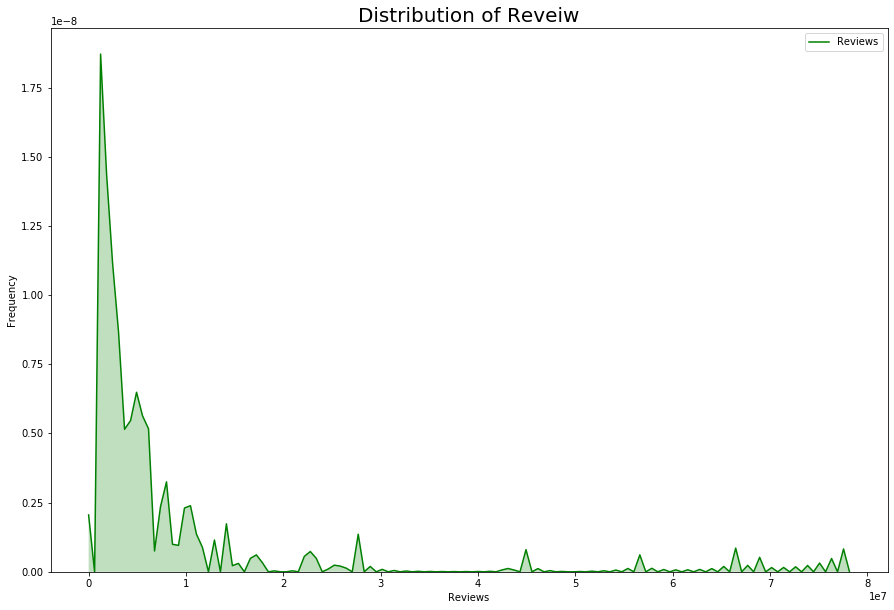

In [21]:
# rating distibution 
rcParams['figure.figsize'] = 15,10
g = sns.kdeplot(googleData.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

Question what is the correlation between rating and reviews?

Text(0.5, 1.0, 'Rating VS Reveiws')

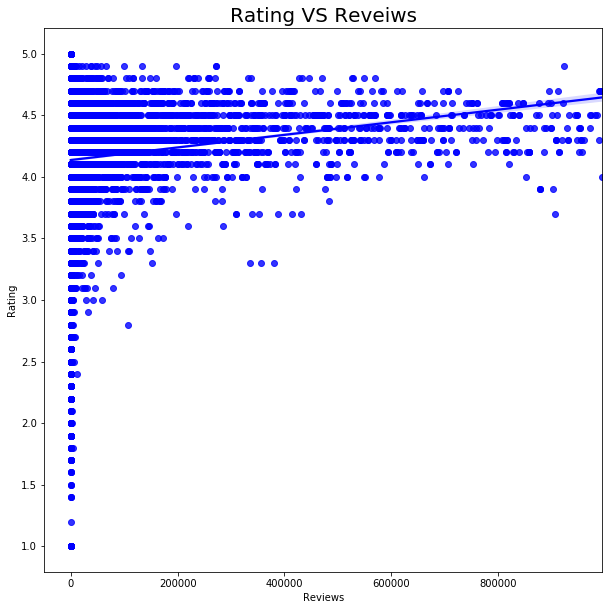

In [22]:
#Rating VS reviews
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'blue',data=googleData[googleData['Reviews']<1000000])
plt.title('Rating VS Reveiws',size = 20)

We can see that generaly that apps with higher ratings recieve more reviews.

Question: what affect does price have on app popularity?

Text(0.5, 1.0, 'Rating VS Price')

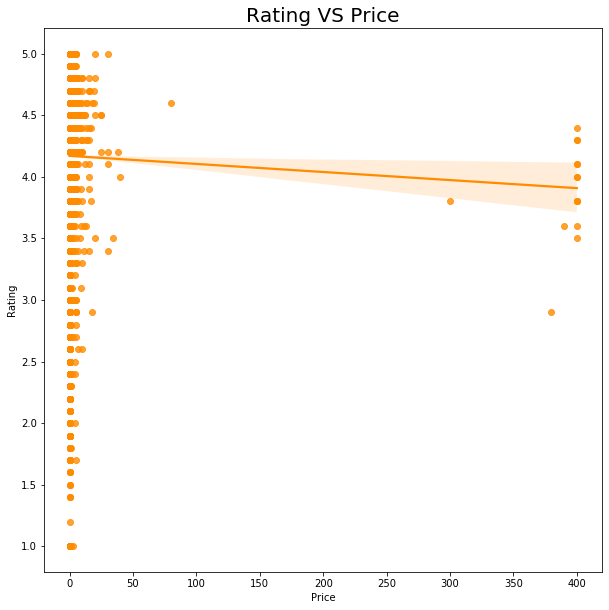

In [23]:
#Rating VS. Price
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=googleData[googleData['Reviews']<1000000])
plt.title('Rating VS Price',size = 20)

We can see that there is a slight curve that suggests that price lowers the rating of the app

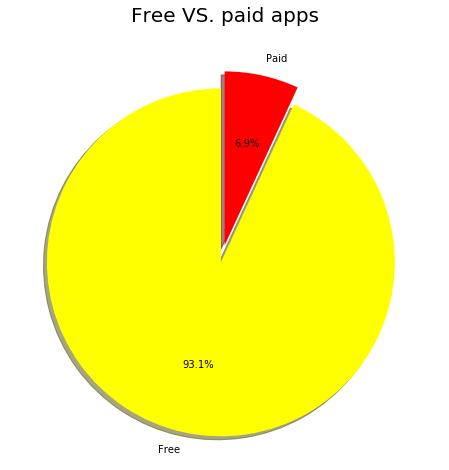

In [24]:
#question what is the distrebution between free apps and payed apps?

labels =googleData['Type'].value_counts(sort = True).index             #create array of elemnts
sizes = googleData['Type'].value_counts(sort = True)                   #amount of each elemnt


colors = ["yellow","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Free VS. paid apps',size = 20)
plt.show()

The information we got from the previous plot(price has a negetive affect on popularity) can explain why there are so few paid apps.

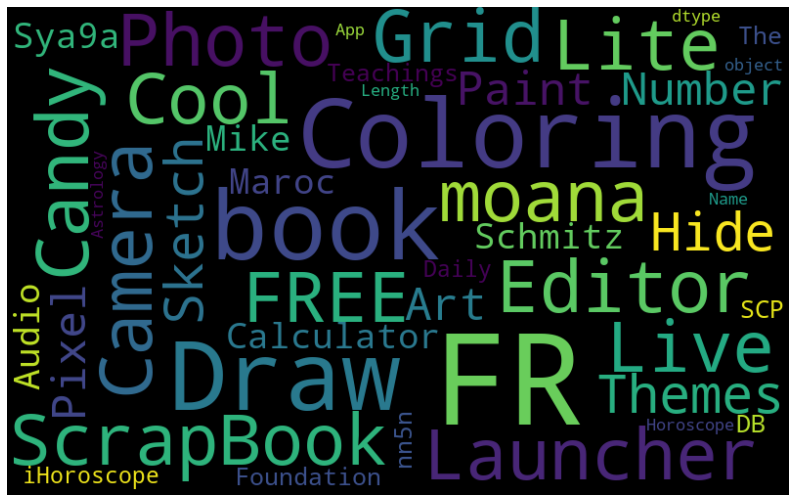

In [25]:
text = str(googleData['App'])
plt.subplots(figsize = (14,11))
wordcloud = WordCloud(stopwords = STOPWORDS, max_font_size = 130,\
                      width = 800, height = 500).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Insights

conclusion:
    family friendly free apps have the largest target market that is probebly why those are the most popular apps.

lets see if our machine lerning prediction will predict the same